# Exercises - Classification

**The end product of this exercise is a jupyter notebook (**
`classification_exercises.ipynb`
**) and** 
`acquire.py`
**. The notebook will contain all your work as you move through the exercises. The** 
`acquire.py` 
**file should contain the final functions.**

In [1]:
import numpy as np
import pandas as pd

import acquire as acq
import prepare as prep

from debug import local_settings, timeifdebug, timeargsifdebug, frame_splain


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [3]:
local_settings.debug=True

In [4]:
local_settings.splain=True

In [5]:
splain=local_settings.splain

### In a jupyter notebook, `classification_exercises.ipynb`:

1. **Use a python module containing datasets as a source from the** 
`iris` 
**data. Create a pandas dataframe,** 
`df_iris`
**, from this data.**

In [6]:
df_iris = pd.read_csv('iris.csv')

  - print the first 3 rows

In [7]:
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


  - print the number of rows and columns (shape)

In [8]:
df_iris.shape

(150, 5)

  - print the column names

In [9]:
frame_splain(df_iris, 'df_iris', splain=splain)

DF_IRIS SHAPE:
(150, 5) 

DF_IRIS INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None 

DF_IRIS DESCRIPTION:
              count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5 

DF_IRIS HEAD:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.

  - print the data type of each column

In [10]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

   - print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [11]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


2. **Read** 
`Table1_CustDetails` 
**the excel module dataset,** 
`Excel_Exercises.xlsx`
**, into a dataframe,** 
`df_excel`
**.**

In [12]:
df_excel = acq.excel_df('Excel_Exercises.xlsx', splain)

starting excel_df
starting check_df
DATAFRAME SHAPE:
(7049, 12) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 12 columns):
customer_id          7049 non-null object
gender               7049 non-null object
is_senior_citizen    7049 non-null int64
partner              7049 non-null object
dependents           7049 non-null object
phone_service        7049 non-null int64
internet_service     7049 non-null int64
contract_type        7049 non-null int64
payment_type         7049 non-null object
monthly_charges      7049 non-null float64
total_charges        7038 non-null float64
churn                7049 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 660.9+ KB
None 

DATAFRAME DESCRIPTION:
                    count         mean          std    min       25%      50%  \
is_senior_citizen  7049.0     0.162009     0.368485   0.00    0.0000     0.00   
phone_service      7049.0     1.324585     0.642709  

  - assign the first 100 rows to a new dataframe, `df_excel_sample`.

In [13]:
df_excel_sample = acq.check_df(df_excel.head(100), splain=splain)

starting check_df
DATAFRAME SHAPE:
(100, 12) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
customer_id          100 non-null object
gender               100 non-null object
is_senior_citizen    100 non-null int64
partner              100 non-null object
dependents           100 non-null object
phone_service        100 non-null int64
internet_service     100 non-null int64
contract_type        100 non-null int64
payment_type         100 non-null object
monthly_charges      100 non-null float64
total_charges        100 non-null float64
churn                100 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 9.5+ KB
None 

DATAFRAME DESCRIPTION:
                   count       mean          std    min       25%       50%  \
is_senior_citizen  100.0     0.1900     0.394277   0.00    0.0000     0.000   
phone_service      100.0     1.3300     0.667499   0.00    1.0000     1.000   
internet_servi

  - print the number of rows of your original dataframe

In [14]:
df_excel.shape[0]

7049

  - print the first 5 column names

In [15]:
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

  - print the column names that have a data type of object

In [16]:
def get_objs(df):
    return df.columns[df.dtypes=='object']
    
get_objs(df_excel)

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

In [17]:
def get_uniques(df, max_uniques=10, target_col=''):
    df_objs = pd.DataFrame(get_objs(df), columns=['cols'])
    df_objs = df_objs[df_objs.cols != target_col]
    df_objs['nuniques'] = df_objs.cols.apply(lambda x: df[x].nunique())
    df_cats = df_objs[df_objs.nuniques <= max_uniques]
    df_cats['uniques'] = df_cats.cols.apply(lambda x: df[x].unique())
    df_objs = df_objs.join(df_cats.uniques, how='left')
    return df_objs.set_index('cols')

get_uniques(df_excel, target_col='churn')


,nuniques,uniques
cols,,
customer_id,7043,NaN
gender,2,"[Female, Male]"
partner,2,"[Yes, No]"
dependents,2,"[Yes, No]"
payment_type,4,"[Mailed check, Electronic check, Credit card (..."


In [18]:
use_df = df_excel
target_col = 'churn'
use_df[target_col] = use_df[target_col].apply(lambda x: x=='Yes' or x==True)

In [19]:
obj_features = get_uniques(df=use_df, target_col=target_col)
features = list(obj_features[obj_features.nuniques<=10].index)
features

['gender', 'partner', 'dependents', 'payment_type']

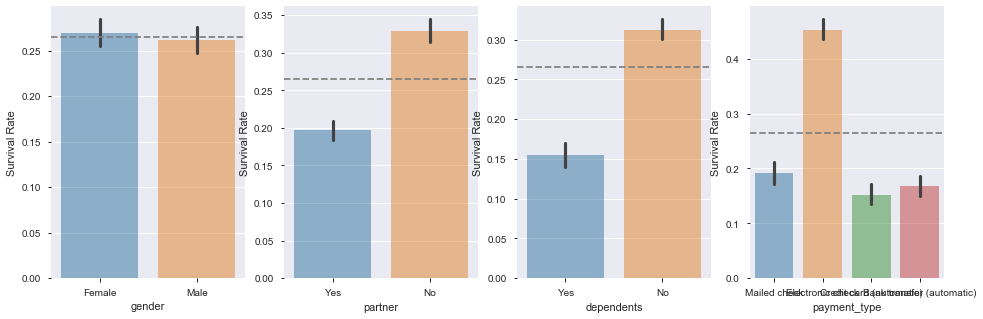

In [20]:
#features = ['sex', 'class', 'alone']

_, ax = plt.subplots(nrows=1, ncols=len(features), figsize=(16,5))

survival_rate = use_df[target_col].mean()

for i, feature in enumerate(features):
    sns.barplot(x=feature, y=target_col, data=use_df, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

In [21]:
def plot_violin(features, target, df):
    for descrete in df[features].select_dtypes([object,int]).columns.tolist():
        if df[descrete].nunique() <= 5:
            for continous in df[features].select_dtypes(float).columns.tolist():
                sns.violinplot(descrete, continous, hue=target,
                data=df, split=True, palette=['blue','orange'])
                plt.title(continous + 'x' + descrete)
                plt.ylabel(continous)
                plt.show()

In [22]:
def loopy_graphs(df, target):
    features = list(df.columns[(df.dtypes == object) | (df.nunique()<5)])
    
    pop_rate = df[target].mean()
    for i, feature in enumerate(features):
        sns.barplot(feature,target,data=df,alpha=.6)
        plt.show()

3. **Read the data from [this google sheet](https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit?usp=sharing) into a dataframe,** `df_google`
**.**

In [23]:
google_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
df_google = acq.google_df(google_url, splain=1)

starting google_df
starting check_df
DATAFRAME SHAPE:
(891, 12) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None 

DATAFRAME DESCRIPTION:
             count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.00

  - print the first 3 rows

In [24]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


  - print the number of rows and columns

In [25]:
df_google.shape

(891, 12)

  - print the column names

In [26]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

  - print the data type of each column

In [27]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

  - print the summary statistics for each of the numeric variables

In [28]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


  - print the unique values for each of your categorical variables

In [29]:
for col in df_google:
    if df_google[col].dtype=='O':
        print(df_google[col].value_counts()[:])
        print()

Saad, Mr. Khalil                                        1
Minahan, Dr. William Edward                             1
Rice, Master. Eugene                                    1
Dowdell, Miss. Elizabeth                                1
Petranec, Miss. Matilda                                 1
Dahl, Mr. Karl Edwart                                   1
Jonsson, Mr. Carl                                       1
Pears, Mrs. Thomas (Edith Wearne)                       1
Lindell, Mr. Edvard Bengtsson                           1
Andrews, Mr. Thomas Jr                                  1
Lefebre, Master. Henry Forbes                           1
Montvila, Rev. Juozas                                   1
Silvey, Mrs. William Baird (Alice Munger)               1
Hewlett, Mrs. (Mary D Kingcome)                         1
Lemore, Mrs. (Amelia Milley)                            1
Stankovic, Mr. Ivan                                     1
Silverthorne, Mr. Spencer Victor                        1
Kassem, Mr. Fa

### In a new python module, `acquire.py`:

1. **`get_titanic_data`:** returns the titanic data from the Codeup data science database as a pandas data frame.

2. **`get_iris_data`:** returns the data from the `iris_db` on the Codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids.

In [30]:
sql='''select measurements.*, species.species_name from measurements join species using (species_id)'''

In [31]:
db_url = acq.sql_df(sql, 'iris_db', splain=1)

starting sql_df
starting get_db_url
ending get_db_url ; time: 3.814697265625e-06
starting check_df
DATAFRAME SHAPE:
(150, 7) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
measurement_id    150 non-null int64
sepal_length      150 non-null float64
sepal_width       150 non-null float64
petal_length      150 non-null float64
petal_width       150 non-null float64
species_id        150 non-null int64
species_name      150 non-null object
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB
None 

DATAFRAME DESCRIPTION:
                count       mean        std  min    25%    50%     75%    max
measurement_id  150.0  75.500000  43.445368  1.0  38.25  75.50  112.75  150.0
sepal_length    150.0   5.843333   0.828066  4.3   5.10   5.80    6.40    7.9
sepal_width     150.0   3.057333   0.435866  2.0   2.80   3.00    3.30    4.4
petal_length    150.0   3.758000   1.765298  1.0   1.60   4.35    5.10    6.9
pet

# Exercises - Data Preparation

**The end product of this exercise should be the specified functions in a python script named** 
`prepare.py`
**. Do these in your classification_exercises.ipynb first, then transfer to the** 
`prepare.py` 
**file.**

### 1. Iris Data

   a. Use the function defined in `acquire.py` to load the iris data.

In [32]:
df1 = acq.get_iris_data(type='sql', splain=1)

starting get_iris_data
starting sql_df
starting get_db_url
ending get_db_url ; time: 1.9073486328125e-06
starting check_df
DATAFRAME SHAPE:
(150, 6) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
measurement_id    150 non-null int64
sepal_length      150 non-null float64
sepal_width       150 non-null float64
petal_length      150 non-null float64
petal_width       150 non-null float64
species_name      150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB
None 

DATAFRAME DESCRIPTION:
                count       mean        std  min    25%    50%     75%    max
measurement_id  150.0  75.500000  43.445368  1.0  38.25  75.50  112.75  150.0
sepal_length    150.0   5.843333   0.828066  4.3   5.10   5.80    6.40    7.9
sepal_width     150.0   3.057333   0.435866  2.0   2.80   3.00    3.30    4.4
petal_length    150.0   3.758000   1.765298  1.0   1.60   4.35    5.10    6.9
petal_width     

   b. Drop the `species_id` and `measurement_id` columns.

In [33]:
df1=acq.check_df(df1.drop(columns='measurement_id', axis=1), splain=splain)

starting check_df
DATAFRAME SHAPE:
(150, 5) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species_name    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None 

DATAFRAME DESCRIPTION:
              count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5 

DATAFRAME HEAD:
   sepal_length  sepal_width  petal_length  petal_width species_name
0           5.1          3.5           1.4          0.2       setosa
1           4.9          3.0           1.4          0.2       setosa
2           4

   c. Rename the `species_name` column to just `species`.

In [34]:
df1=acq.check_df(df1.rename(columns={'species_name': 'species'}), splain=1)

starting check_df
DATAFRAME SHAPE:
(150, 5) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None 

DATAFRAME DESCRIPTION:
              count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5 

DATAFRAME HEAD:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2

   d. Encode the species name using a sklearn label encoder. Research the `inverse_transform` method of the label encoder. How might this be useful?

In [35]:
def encode_col(df, col):
    encoder = LabelEncoder()
    encoder.fit (df[col])
    df[col] = encoder.transform(df[col])
    return encoder
    
    
encoder1 = encode_col(df1, 'species')
    
frame_splain(df1, splain=splain)

DATAFRAME SHAPE:
(150, 5) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB
None 

DATAFRAME DESCRIPTION:
              count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5
species       150.0  1.000000  0.819232  0.0  0.0  1.00  2.0  2.0 

DATAFRAME HEAD:
   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4   

   e. Create a function named `prep_iris` that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [36]:
df_iris_final, iris_encoder = prep.prep_iris(splain=0)
frame_splain(df_iris_final, splain=splain)

starting prep_iris
starting get_iris_data
starting sql_df
starting get_db_url
ending get_db_url ; time: 5.0067901611328125e-06
starting check_df
ending check_df ; time: 4.982948303222656e-05
ending sql_df ; time: 1.2498083114624023
ending get_iris_data ; time: 1.2499299049377441
starting encode_col
ending encode_col ; time: 0.005184650421142578
ending prep_iris ; time: 1.2615296840667725
DATAFRAME SHAPE:
(150, 5) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB
None 

DATAFRAME DESCRIPTION:
              count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4


### 2. Titanic Data

a. **Use the function you defined in** 
`acquire.py` 
**to load the titanic data set.**

In [54]:
df = acq.get_titanic_data(splain=True)

starting get_titanic_data
starting sql_df
starting get_db_url
ending get_db_url ; time: 4.0531158447265625e-06
starting check_df
DATAFRAME SHAPE:
(891, 13) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
passenger_id    891 non-null int64
survived        891 non-null int64
pclass          891 non-null int64
sex             891 non-null object
age             714 non-null float64
sibsp           891 non-null int64
parch           891 non-null int64
fare            891 non-null float64
embarked        889 non-null object
class           891 non-null object
deck            203 non-null object
embark_town     889 non-null object
alone           891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB
None 

DATAFRAME DESCRIPTION:
              count        mean         std   min       25%       50%    75%  \
passenger_id  891.0  445.000000  257.353842  0.00  222.5000  445.0000  667.5   
surv

b. **Handle the missing values in the** 
`embark_town` 
**and** 
`embarked` 
**columns.**

*Function to impute*

In [59]:
from sklearn.impute import SimpleImputer

In [60]:
@timeifdebug
def simpute(df, column, missing_values=np.nan, strategy='most_frequent', splain=local_settings.splain):
    '''
    simpute(df, column, missing_values=np.nan, strategy='most_frequent', splain=local_settings.splain)
    RETURNS: df
    '''
    df[[column]] = df[[column]].fillna(missing_values)
    imp_mode = SimpleImputer(missing_values=missing_values, strategy=strategy)
    df[[column]] = imp_mode.fit_transform(df[[column]])
    return df

In [61]:
df = simpute(df=df, column='embarked', splain=splain)
df = simpute(df=df, column='embark_town', splain=splain)

starting simpute
ending simpute ; time: 0.01172780990600586
starting simpute
ending simpute ; time: 0.009991884231567383


c. **Remove the** 
`deck` 
**column.**

In [62]:
df.drop(columns=['deck'], inplace=True)

d. **Use a label encoder to transform the** 
`embarked` 
**column.**

*Function to encode*

In [63]:
@timeifdebug
def encode_col(df, col):
    '''
    encode_col(df, col)
    RETURNS: df, encoder
    '''
    encoder = LabelEncoder()
    encoder.fit (df[[col]])
    df[[col]] = encoder.transform(df[[col]])
    return df, encoder

e. **Scale the** 
`age` 
**and** 
`fare` 
**columns using a min max scaler. Why might this be beneficial? When might you not want to do this?**

In [64]:
scaler = MinMaxScaler()
scaler.fit(df[['age','fare']])
df[['age','fare']] = scaler.transform(df[['age','fare']])

f. **Create a function named** 
`prep_titanic` 
**that accepts the untransformed titanic data, and returns the data with the transformations above applied.**

In [50]:
@timeifdebug
def prep_titanic(splain=local_settings.splain):
    '''
    prep_titanic(splain=local_settings.splain)
    RETURNS: df, encoder, scaler
    
    
    # Titanic Data

    # 1. Use the function you defined in acquire.py to load the titanic data set.
    # 2. Handle the missing values in the embark_town and embarked columns.
    # 3. Remove the deck column.
    # 4. Use a label encoder to transform the embarked column.
    # 5. Scale the age and fare columns using a min max scaler. Why might this be 
    # beneficial? When might you not want to do this?
    # 6. Create a function named prep_titanic that accepts the untransformed 
    # titanic data, and returns the data with the transformations above applied.

    # Note: drop columns updated to deck, embarked, passenger_id in explore
    # Note: encoding changed to embark_town
    '''
    df = get_titanic_data(splain=splain)
    df.drop(columns=['deck', 'embarked','passenger_id'], inplace=True)
    df = simpute(df=df, column='embark_town', splain=splain)
    df, encoder = encode_col(df=df, col='embark_town')
    scaler = MinMaxScaler()
    scaler.fit(df[['age','fare']])
    df[['age','fare']] = scaler.transform(df[['age','fare']])
    return df, encoder, scale

In [51]:
df_titanic, encoder_titanic, scaler_titanic = prep.prep_titanic(splain=False)

starting prep_titanic
starting get_titanic_data
starting sql_df
starting get_db_url
ending get_db_url ; time: 2.86102294921875e-06
starting check_df
ending check_df ; time: 1.2159347534179688e-05
ending sql_df ; time: 1.2865440845489502
ending get_titanic_data ; time: 1.2866201400756836
starting simpute
ending simpute ; time: 0.00644993782043457
starting encode_col
ending encode_col ; time: 0.003610849380493164
ending prep_titanic ; time: 1.308058738708496


# Exercises - Data Exploration
### Continue in your `classification_exercises.ipynb` notebook. Use the iris dataset.

1. **Split data into train (70%) & test (30%) samples.**

2. **Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis is the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.**

3. **Create 4 subplots (2 rows x 2 columns) of scatterplots**
   - sepal_length x sepal_width
   - petal_length x petal_width
   - sepal_area x petal_area
   - sepal_length x petal_length
   
   **Make your figure size 14 x 8. What are your takeaways?**

4. **Create a heatmap of each variable layering correlation coefficient on top.**

5. **Create a scatter matrix visualizing the interaction of each variable**

6. **Is the sepal length significantly different in virginica compared to versicolor? Run an experiment to test this.**

   - must include null hypothesis, alternative hypothesis, t-test, results, summary
   - $H_0$: the difference in sepal length between virginica and versicolor is insignificant.
   - $H_a$: the difference in sepal length between virginica and versicolor is substantial.
   - We will test if the sepal length of virginica is significantly different than that of the versicolor.
   - If there is difference, then variable sepal_length is a good choice to keep as a feature.
   - We can use a t-test here, as sepal_length is somewhat normally distributed.